In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

In [2]:
print(check_output(["cmd", "/c", "dir"]).decode("utf8"))


# Any results you write to the current directory are saved as output.

 Volume in drive C is Windows-SSD
 Volume Serial Number is 704D-7E7D

 Directory of C:\Users\moham\Downloads\Placements\Data-analysis\Football-Dataset-Analysis

10-09-2025  20:23    <DIR>          .
10-09-2025  19:41    <DIR>          ..
10-09-2025  19:39    <DIR>          .ipynb_checkpoints
10-09-2025  19:37         2,159,885 barca.jpg
10-09-2025  19:37         2,166,742 barcavsrealmadrid.jpg
10-09-2025  20:23            60,282 Data_analysis_football.ipynb
10-09-2025  19:37         1,252,445 Data_analysis_footballv1.ipynb
10-09-2025  19:37         5,578,231 Football Event Analysis.pdf
10-09-2025  19:37         2,006,820 Football_Dataset_Analysis-v1.ipynb
10-09-2025  19:37           766,186 football_dataset_analysis.ipynb
10-09-2025  19:37           859,303 Football_Event_Analysis-SARAH-SONNA-LIONEL.ipynb
10-09-2025  19:37           468,944 Football_Event_Analysis-SONNA.ipynb
10-09-2025  19:37           340,248 football_goal_prediction_ml.ipynb
10-09-2025  19:37           113,608 footb

In [3]:
## Loading events dataset
df_events = pd.read_csv(r"C:\Users\moham\Downloads\Placements\Data-analysis\events.csv")
df_game_info = pd.read_csv(r"C:\Users\moham\Downloads\Placements\Data-analysis\ginf.csv")
## Selecting only the features I need. `id_odsp` serves as a unique identifier that will be used to 
## union the 2 datasets
df_game_info = df_game_info[['id_odsp', 'date', 'league', 'season', 'country']]


In [4]:
## Join the 2 datasets to add 'date', 'league', 'season', and 'country' information to the main dataset
df_events = df_events.merge(df_game_info, how='left')

In [5]:
## Naming the leagues with their popular names, which will make thinks much clear for us
leagues = {'E0': 'Premier League', 'SP1': 'La Liga',
          'I1': 'Serie A', 'F1': 'League One', 'D1': 'Bundesliga'}


In [6]:
## Apply the mapping
df_events['league'] = df_events['league'].map(leagues)

In [7]:
def plot_barplot(data, x_ticks, x_labels, y_labels, title, color='Accent_r', num=10, figsize=8):
    ## Set standard style
    sns.set_style("whitegrid")

    ## Set figure size
    plt.figure(figsize=(num, figsize))

    ## Plotting data with a color palette applied explicitly
    ax = sns.barplot(
        x=[j for j in range(len(data))],
        y=data.values,
        palette=sns.color_palette(color, len(data))  # Fix here: Apply color palette properly
    )

    ## Setting x-ticks
    ax.set_xticks([j for j in range(len(data))])
    ax.set_xticklabels(x_ticks, rotation=45)

    ## Set labels and title
    ax.set(xlabel=x_labels, ylabel=y_labels, title=title)

    plt.tight_layout()
    plt.show()


In [8]:
## Utility function to plot bar plots with similar configuration
def plot_barplot(data, x_ticks, x_labels, y_labels, title, color='muted', num=10, figsize=8):
    ## Set standard style as whitegrid (this also could be customized via param)
    sns.set_style("whitegrid")   # Proposed themes: darkgrid, whitegrid, dark, white, and ticks

    ## Set a figure with custom figsize
    plt.figure(figsize=(num, figsize))
    ## Plottin data
    ax = sns.barplot(x = [j for j in range(0, len(data))], y=data.values, palette=color)
    ## Setting ticks extracted from data indexes
    ax.set_xticks([j for j in range(0, len(data))])
    ## Set labels of the chart
    ax.set_xticklabels(x_ticks, rotation=45)
    ax.set(xlabel = x_labels, ylabel = y_labels, title = title)
    ax.plot();
    plt.tight_layout()

In [9]:
## Count of events occurecies
events_series = df_events['event_type'].value_counts()

print(len(events_series))        # Number of bars (should match num ticks)
print(len(events_series.index))  # This gives the number of unique event types


plot_barplot(events_series, events_series.index,  # Use the index (event type names)
            "Event type", "Number of events", "Event types", 'Accent_r', 10, 5)

11
11


C:\Users\moham\AppData\Local\Temp\ipykernel_6696\479868677.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




In [10]:
## Filter attempts that did NOT result in goals
df_shot_places = df_events[(df_events['event_type'] == 1) & 
                           (df_events['is_goal'] == 0)]['shot_place'].value_counts()

## Take top 5 most frequent shot places
top_shot_places_no_goal = df_shot_places.head(5)

## Plot the chart
plot_barplot(
    top_shot_places_no_goal,
    top_shot_places_no_goal.index,
    'Shot places',
    'Number of events',
    'Shot places not resulting in goals',
    'BuGn_r',
    8,
    5
)


C:\Users\moham\AppData\Local\Temp\ipykernel_6696\479868677.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




In [11]:
## Filter attempts where goal was NOT scored
df_shot_places = df_events[(df_events['event_type'] == 1) & 
                           (df_events['is_goal'] == 0)]['shot_place'].value_counts()

## Take top 5 most frequent shot places
top_shot_places_no_goal = df_shot_places.head(5)

## Plot the chart
plot_barplot(
    top_shot_places_no_goal,
    top_shot_places_no_goal.index,
    'Shot places',
    'Number of events',
    'Shot places not resulting in goals',
    'BuGn_r',
    8,
    5
)


C:\Users\moham\AppData\Local\Temp\ipykernel_6696\479868677.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




In [12]:
## Copying original dataframe
df_shot_places_ed = df_events.copy()

## Grouping data by shot places
df_shot_places_ed = df_events.groupby('shot_place', as_index=False).count().sort_values('id_event',
                                                   ascending=False).dropna()

## Mapping dataframe index to shot places labels available in the dictionary file
df_shot_places_ed['shot_place'] = df_shot_places_ed['shot_place'].map(df_shot_places)

## Plotting the chart
plot_barplot(df_shot_places_ed['id_event'], df_shot_places_ed['shot_place'],
             'Shot places',
             'Number of events',
             'Shot places',
             'BuGn_r', 8, 5)

C:\Users\moham\AppData\Local\Temp\ipykernel_6696\479868677.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




In [13]:
## Grouping attempts by team
grouping_by_offensive = df_events[df_events['is_goal']==1].groupby('event_team')

## Sorting the values
grouping_by_offensive = grouping_by_offensive.count().sort_values(by='id_event', ascending=False)[:10]
teams = grouping_by_offensive.index
scores = grouping_by_offensive['id_event']

## Plotting the teams
plot_barplot(scores, teams, 'Teams', '# of goals', 'Most offensive teams', 'GnBu_d', 8, 6)

C:\Users\moham\AppData\Local\Temp\ipykernel_6696\479868677.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




In [14]:
## Grouping attempts by team
grouping_by_offensive = df_events[df_events['is_goal']==1].groupby('event_team')

## Sorting the values
grouping_by_offensive = grouping_by_offensive.count().sort_values(by='id_event', ascending=True)[:10]
teams = grouping_by_offensive.index
scores = grouping_by_offensive['id_event']

## Plotting the teams
plot_barplot(scores, teams, 'Teams', '# of goals', 'Less offensive teams', 'GnBu_d', 8, 6)

C:\Users\moham\AppData\Local\Temp\ipykernel_6696\479868677.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




In [15]:
## grouping by player when is goal
grouping_by_offensive_player = df_events[df_events['is_goal']==1].groupby('player')

## Couting and sorting the number of goals by player, then pick the top 10
grouping_by_offensive_player = grouping_by_offensive_player.count().sort_values(by='id_event',
                                                                                ascending=False)[:10]
## Extracting player names
players = grouping_by_offensive_player.index
## Extracting values (# of goals)
scores = grouping_by_offensive_player['id_event']

## Plotting the chart
plot_barplot(scores, players, 'Players', '# of score', 'Most offensive players', 'GnBu_d', 8, 6)

C:\Users\moham\AppData\Local\Temp\ipykernel_6696\479868677.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




In [16]:
## Loading events dataset
df_events1 = pd.read_csv(r"C:\Users\moham\Downloads\Placements\Data-analysis\events.csv")
df_ginf1   = pd.read_csv(r"C:\Users\moham\Downloads\Placements\Data-analysis\ginf.csv")

## Selecting only the features I need. `id_odsp` serves as a unique identifier that will be used to 
## union the 2 datasets
## Join the 2 datasets to add 'date', 'league', 'season', and 'country' information to the main dataset
df_events1 = df_events1.merge(df_ginf1, how='left')
df_events1 = df_events1[['id_odsp', 'id_event', 'league', 'season', 'ht', 'at', 'event_team', 'is_goal']]
## Naming the leagues with their popular names, which will make thinks much clear for us
leagues = {'E0': 'Premier League', 'SP1': 'La Liga',
          'I1': 'Serie A', 'F1': 'League One', 'D1': 'Bundesliga'}
## Apply the mapping
df_events1['league'] = df_events1['league'].map(leagues)

# cats = ['id_odsp', 'id_event', 'league', 'season', 'ht', 'at', 'event_team']
# d = dict.fromkeys(cats,'category')
# df_events1 = df_events1.astype(d)

In [17]:
df_events1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941009 entries, 0 to 941008
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_odsp     941009 non-null  object
 1   id_event    941009 non-null  object
 2   league      941009 non-null  object
 3   season      941009 non-null  int64 
 4   ht          941009 non-null  object
 5   at          941009 non-null  object
 6   event_team  941009 non-null  object
 7   is_goal     941009 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 57.4+ MB


In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
Leagues = df_events1['league'].unique()
Seasons = list(df_events1['season'].unique())
print(Leagues)
print(Seasons)

['Bundesliga' 'League One' 'La Liga' 'Serie A' 'Premier League']
[np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017)]


In [20]:
df_events1[df_events1['league']== 'Bundesliga'][df_events1['season'] == 2012]['ht'].unique()

array(['Borussia Dortmund', 'FC Augsburg', 'Werder Bremen',
       'Hertha Berlin', 'FC Cologne', 'VfB Stuttgart', 'Hannover 96',
       'Mainz', 'Bayern Munich', 'Schalke 04', 'TSG Hoffenheim',
       'Nurnberg', 'SC Freiburg', 'Hamburg SV',
       'Borussia Monchengladbach', 'VfL Wolfsburg', 'Bayer Leverkusen',
       'Kaiserslautern'], dtype=object)

In [21]:
for league in list(leagues.values())[::-1]:
    if league == 'Premier League':
        print('No details on {}'.format(league))
    else:
        for season in Seasons[::-1]:
            print('**** Informations about {} {} ****'.format(league, season))
            Stats = []
            Teams = df_events1[(df_events1['league'] == league) & (df_events1['season'] == season)]['ht'].unique()
            Games = df_events1[(df_events1['league'] == league) & (df_events1['season'] == season)]['id_odsp'].unique()
            
            for game in Games:
                Events = df_events1[(df_events1['league'] == league) & 
                                    (df_events1['season'] == season) & 
                                    (df_events1['id_odsp'] == game)]
                
                ht = Events.iloc[1, 4]
                at = Events.iloc[1, 5]
                Butat = 0
                Butht = 0
                
                for j in range(1, Events.shape[0]):
                    if Events.iloc[j, 7] == 1:
                        if Events.iloc[j, 6] == ht:
                            Butat += 1
                        else:
                            Butht += 1
                
                item = [ht, at, Butht, Butat]
                Stats.append(item)
            
            Stats = np.array(Stats)
            df_Stats = pd.DataFrame({
                'Teamht': Stats[:, 0],
                'Butht': Stats[:, 2].astype(int),
                'Teamat': Stats[:, 1],
                'But at': Stats[:, 3].astype(int)
            })

            results = []
            for team in Teams:
                data_team = df_Stats.loc[(df_Stats['Teamht'] == team) | (df_Stats['Teamat'] == team)]
                nbrgoals = data_team['Butht'].sum() + data_team['But at'].sum()
                elem = [team, nbrgoals]
                results.append(elem)

            results = np.array(results)
            ids = np.argsort(results[:, 1].astype(int))[::-1]
            results[:, 1] = results[:, 1][ids]
            results[:, 0] = results[:, 0][ids]

            df_results = pd.DataFrame({'ATeam': results[:, 0], 'ButsE': results[:, 1]})
            print(df_results)


**** Informations about Bundesliga 2017 ****
                       ATeam ButsE
0              Werder Bremen    57
1          Borussia Dortmund    56
2                      Mainz    55
3                SC Freiburg    51
4           Bayer Leverkusen    51
5              Bayern Munich    50
6                 RB Leipzig    48
7                 Hamburg SV    46
8             TSG Hoffenheim    46
9              Hertha Berlin    44
10          FC Ingolstadt 04    42
11           SV Darmstadt 98    41
12                Schalke 04    40
13             VfL Wolfsburg    39
14  Borussia Monchengladbach    39
15       Eintracht Frankfurt    37
16                FC Cologne    36
17               FC Augsburg    32
**** Informations about Bundesliga 2016 ****
                       ATeam ButsE
0              VfB Stuttgart   121
1   Borussia Monchengladbach   115
2              Werder Bremen   114
3          Borussia Dortmund   112
4                 Schalke 04    95
5              Bayern Munich    92


KeyboardInterrupt: 

In [22]:
Leagues

array(['Bundesliga', 'League One', 'La Liga', 'Serie A', 'Premier League'],
      dtype=object)

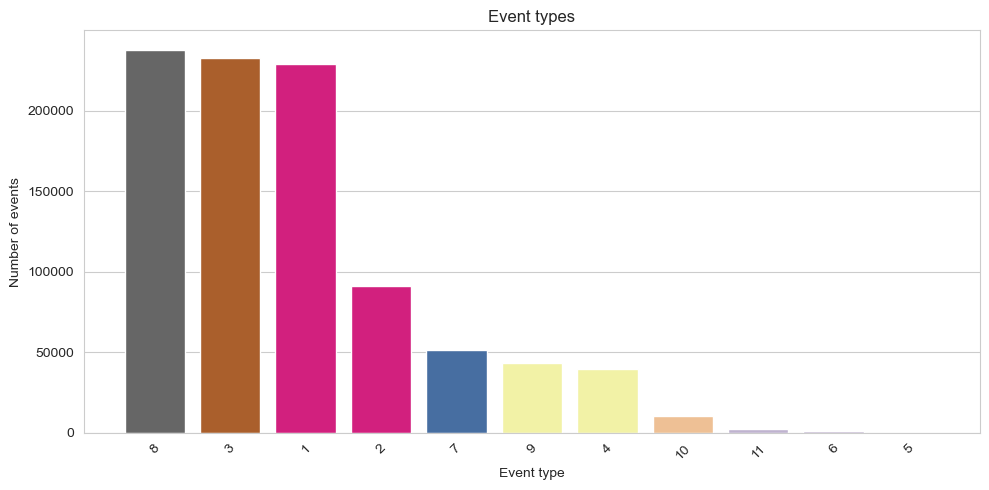

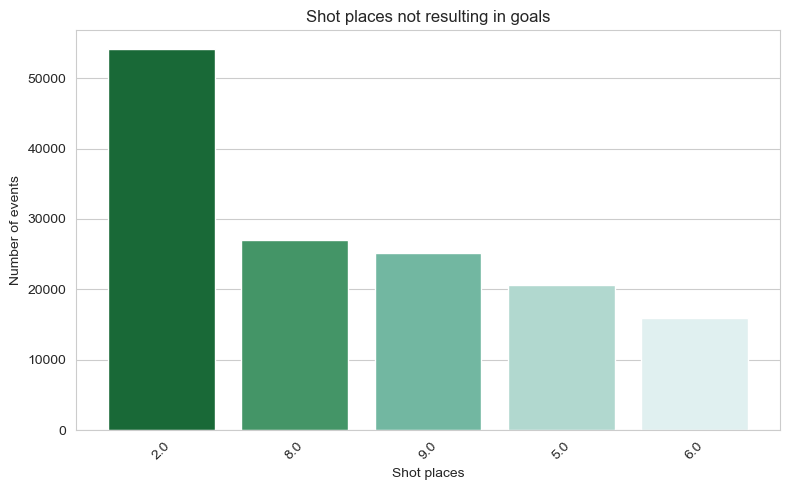

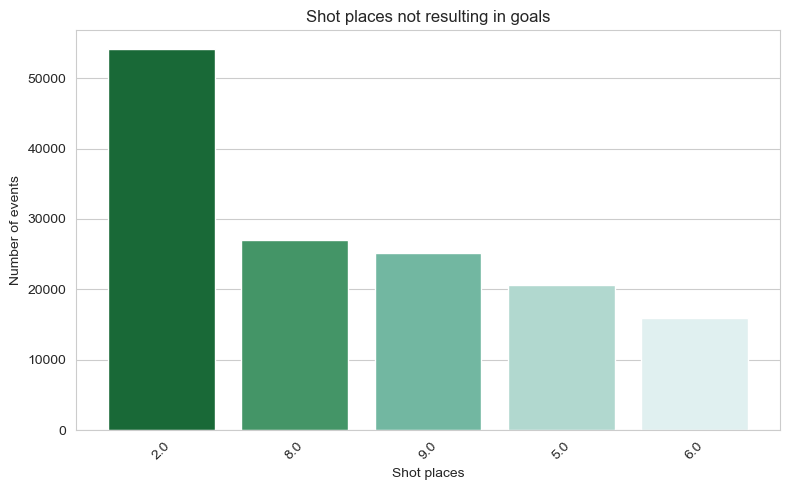

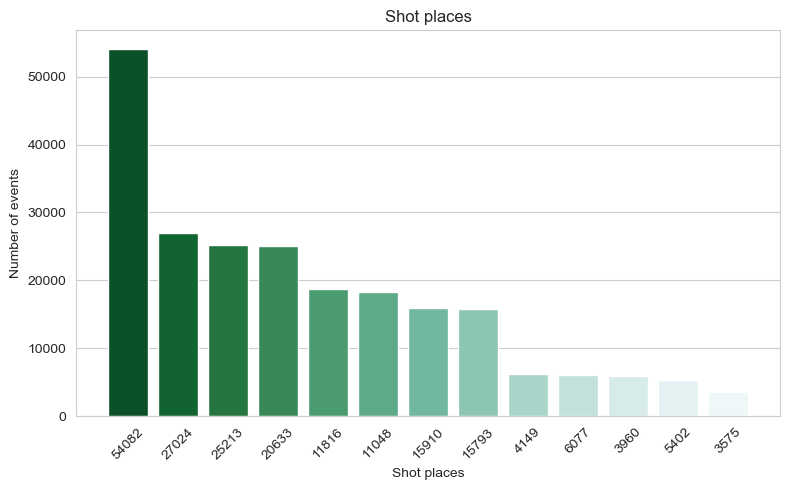

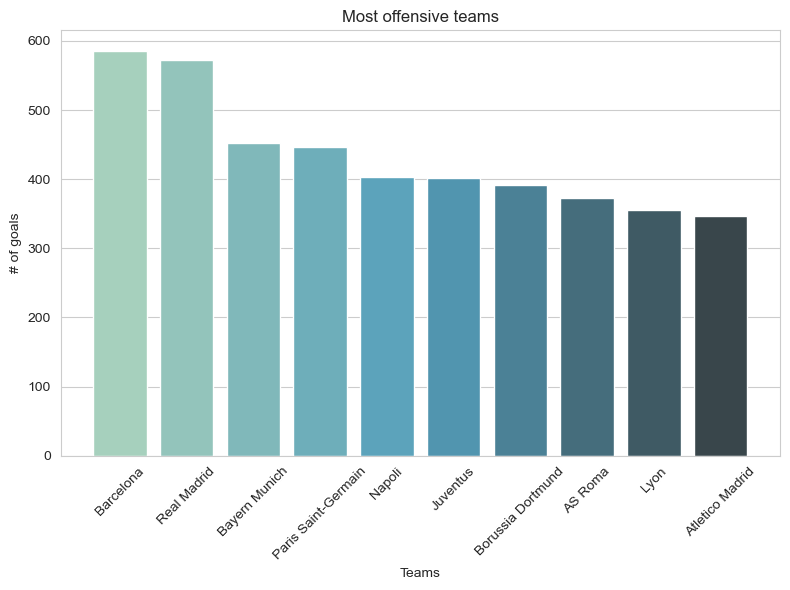

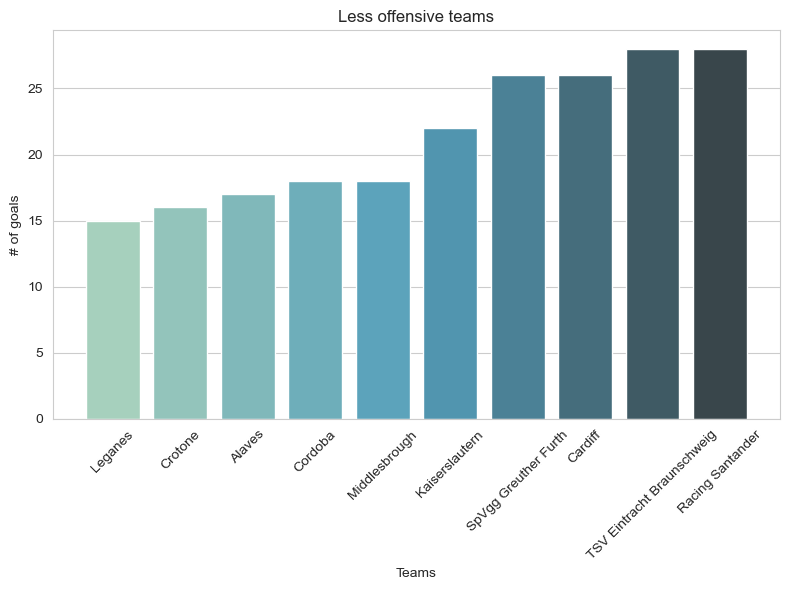

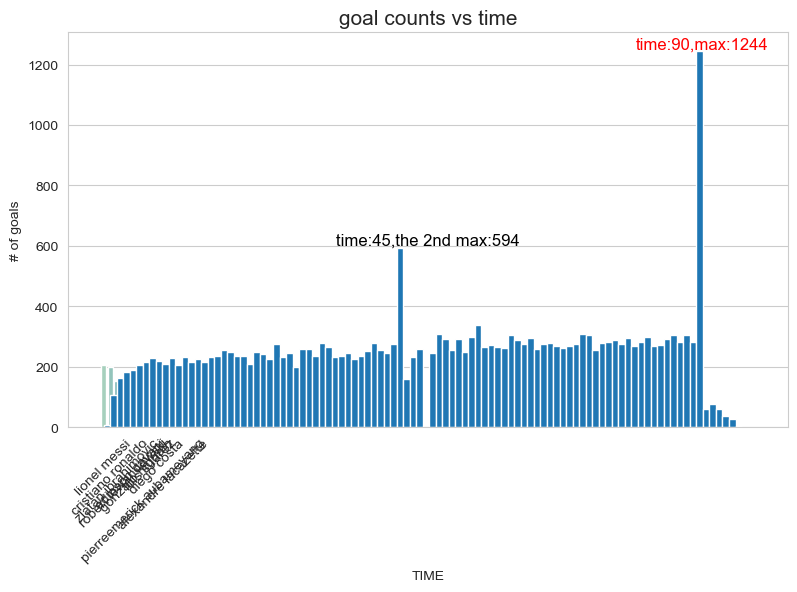

In [23]:
## grouping by player when is goal
goal = df_events[df_events['is_goal']==1]

## Plotting the hist
# fig=plt.figure(figsize=(13,10))
plt.hist(goal.time, 100)
plt.xlabel("TIME",fontsize=10)
plt.ylabel("# of goals",fontsize=10)
plt.title("goal counts vs time",fontsize=15)
x=goal.groupby(by='time')['time'].count().sort_values(ascending=False).index[0]
y=goal.groupby(by='time')['time'].count().sort_values(ascending=False).iloc[0]
x1=goal.groupby(by='time')['time'].count().sort_values(ascending=False).index[1]
y1=goal.groupby(by='time')['time'].count().sort_values(ascending=False).iloc[1]
plt.text(x=x-10,y=y+10,s='time:'+str(x)+',max:'+str(y),fontsize=12,fontdict={'color':'red'})
plt.text(x=x1-10,y=y1+10,s='time:'+str(x1)+',the 2nd max:'+str(y1),fontsize=12,fontdict={'color':'black'})
plt.show() 

In [24]:
redCards = df_events[df_events['event_type'] == 6]['event_team']

In [25]:
## Count of events occurecies
redCards_series = redCards.value_counts().sort_values(ascending=True)[20:50]

## Plotting chart 
plot_barplot(redCards_series, redCards_series.index,
            "Event_team", "Number of Red Cards", "Red Cards per team", 'gist_earth', 10, 5)

In [26]:
yellowCards = df_events[df_events['event_type'] == (4 or 5)]['event_team']

In [27]:
## Count of events occurecies
yellowCards_series = yellowCards.value_counts()[:10]

## Plotting chart 
plot_barplot(yellowCards_series, yellowCards_series.index,
            "Event_team", "Number of yellow Cards", "Yellow Cards per team", 'gist_earth', 10, 5)

In [28]:
df_events['event_team'].unique()

array(['Hamburg SV', 'Borussia Dortmund', 'FC Augsburg', 'SC Freiburg',
       'Werder Bremen', 'Kaiserslautern', 'Lorient',
       'Paris Saint-Germain', 'Valenciennes', 'Caen', 'Hertha Berlin',
       'Nurnberg', 'Evian Thonon Gaillard', 'Brest', 'AC Ajaccio',
       'Toulouse', 'Nice', 'Lyon', 'VfL Wolfsburg', 'FC Cologne',
       'AS Nancy Lorraine', 'Lille', 'Montpellier', 'AJ Auxerre',
       'VfB Stuttgart', 'Schalke 04', 'Hannover 96', 'TSG Hoffenheim',
       'Sochaux', 'Marseille', 'Bordeaux', 'St Etienne', 'Stade Rennes',
       'Dijon FCO', 'Mainz', 'Bayer Leverkusen', 'Bayern Munich',
       'Borussia Monchengladbach', 'Sporting Gijon', 'Real Sociedad',
       'Valencia', 'Racing Santander', 'Real Madrid', 'Real Zaragoza',
       'Sevilla', 'Malaga', 'Rayo Vallecano', 'Athletic Bilbao', 'Getafe',
       'Levante', 'Osasuna', 'Atletico Madrid', 'Espanyol', 'Mallorca',
       'Villarreal', 'Barcelona', 'AC Milan', 'Lazio', 'Cesena', 'Napoli',
       'Internazionale', 'Palerm

In [33]:
def Team_strategy(team):  
    goal = df_events[df_events['is_goal']==1][df_events['event_team'] == team]
    plt.hist(goal[goal["situation"]==1]["time"],width=1,bins=100,label="Open play")   
    plt.hist(goal[goal["situation"]==2]["time"],width=1,bins=100,label="Set Piece (excluding direct FreeKick)") 
    plt.hist(goal[goal["situation"]==3]["time"],width=1,bins=100,label="Corners") 
    plt.hist(goal[goal["situation"]==4]["time"],width=1,bins=100,label="Direct Free Kick") 
    plt.xlabel("Minutes")
    plt.ylabel("Number of goals")
    plt.legend()
    plt.title("Number of goals (by situations) against Time during match for {}".format(team), 
          fontname="Times New Roman", fontsize=14, fontweight="bold")
    plt.tight_layout()

In [47]:
#plt.subplot(4,1,1)
team = 'Chelsea'
Team_strategy(team)


In [48]:
#plt.subplot(4,1,2)
team = 'Juventus'
Team_strategy(team)


In [49]:
plt.subplot(4,1,3)
team = 'Barcelona'
Team_strategy(team)

In [50]:
plt.subplot(4,1,4)
team = 'Real Madrid'
Team_strategy(team)

In [51]:
# Penalties
penalties=df_events[df_events["location"]==14]

In [52]:
# Check the shot place
for i in range(14):
    if sum(penalties["shot_place"]==i)==0:
        print(i)

0
2


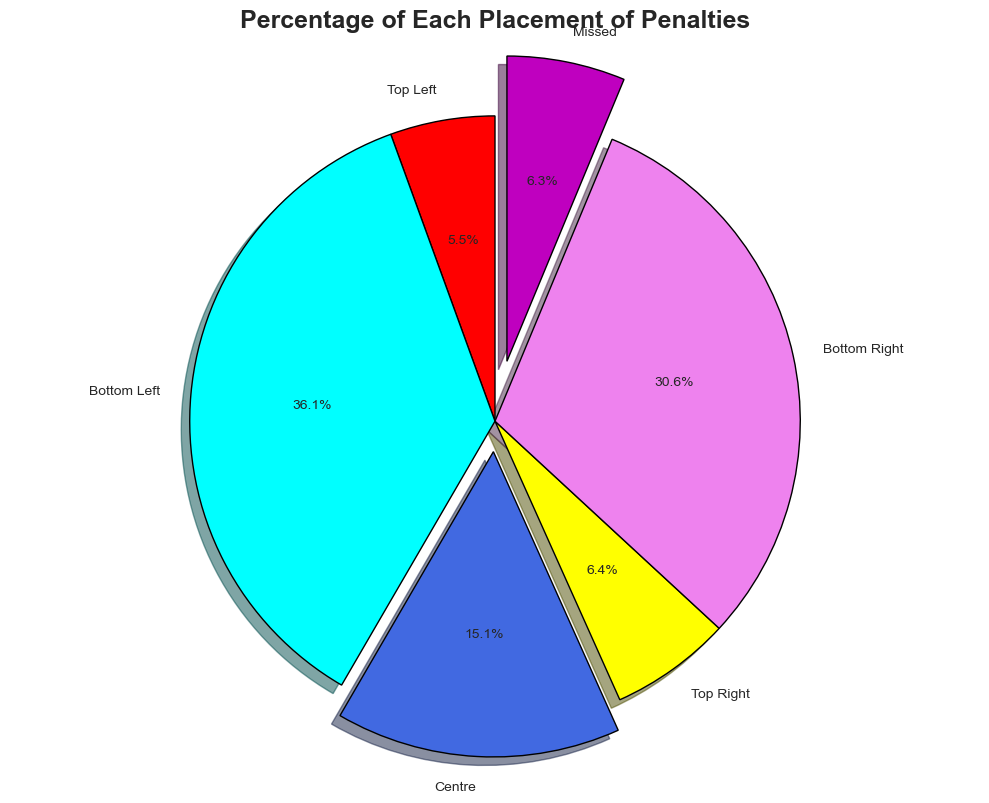

In [54]:
import matplotlib.pyplot as plt

top_left = sum(penalties["shot_place"] == 12)
bot_left = sum(penalties["shot_place"] == 3)
top_right = sum(penalties["shot_place"] == 13)
bot_right = sum(penalties["shot_place"] == 4)
centre = sum(penalties["shot_place"] == 5) + sum(penalties["shot_place"] == 11)
missed = sum(penalties["shot_place"] == 1) + sum(penalties["shot_place"] == 6) + sum(penalties["shot_place"] == 7) + sum(penalties["shot_place"] == 8) + sum(penalties["shot_place"] == 9) + sum(penalties["shot_place"] == 10)

labels_pen = ["Top Left", "Bottom Left", "Centre", "Top Right", "Bottom Right", "Missed"]
num_pen = [top_left, bot_left, centre, top_right, bot_right, missed]
colors_pen = ["red", "aqua", "royalblue", "yellow", "violet", "m"]

plt.figure(figsize=(10, 8))  # Bigger figure

plt.pie(
    num_pen,
    labels=labels_pen,
    colors=colors_pen,
    autopct='%1.1f%%',
    startangle=90,
    explode=(0, 0, 0.1, 0, 0, 0.2),  # Emphasize 'Centre' and 'Missed'
    shadow=True,
    labeldistance=1.1,  # Move labels further out
    wedgeprops={'edgecolor': 'black'}
)

plt.axis('equal')
plt.title("Percentage of Each Placement of Penalties", fontsize=18, fontweight="bold")
plt.tight_layout()
plt.show()


In [55]:
# success rate of penalties
scored_pen=penalties[penalties["is_goal"]==1]
pen_rightfoot=scored_pen[scored_pen["bodypart"]==1].shape[0]
pen_leftfoot=scored_pen[scored_pen["bodypart"]==2].shape[0]

penalty_combi=pd.DataFrame({"right foot":pen_rightfoot,"left foot":pen_leftfoot},index=["Scored"])
penalty_combi.plot(kind="bar")
plt.title("Penalties scored (Right/Left foot)",fontsize=14,fontweight="bold")
penalty_combi

,right foot,left foot
Scored,1535,454


In [59]:
def pen_stats(player):
    player_pen=penalties[penalties["player"]==player]
    right_attempt=player_pen[player_pen["bodypart"]==1]
    right_attempt_scored=right_attempt[right_attempt["is_goal"]==1].shape[0]
    right_attempt_missed=right_attempt[right_attempt["is_goal"]==0].shape[0]
    left_attempt=player_pen[player_pen["bodypart"]==2]
    left_attempt_scored=left_attempt[left_attempt["is_goal"]==1].shape[0]
    left_attempt_missed=left_attempt[left_attempt["is_goal"]==0].shape[0]
    scored=pd.DataFrame({"right foot":right_attempt_scored,"left foot":left_attempt_scored},index=["Scored"])
    missed=pd.DataFrame({"right foot":right_attempt_missed,"left foot":left_attempt_missed},index=["Missed"])
    combi = pd.concat([scored, missed])

    return combi

In [60]:
pen_stats("james rodriguez")

,right foot,left foot
Scored,0,2
Missed,0,0


In [61]:
pen_stats("lionel messi")

,right foot,left foot
Scored,0,30
Missed,0,7


In [62]:
pen_stats("cristiano ronaldo")

,right foot,left foot
Scored,43,0
Missed,8,0


In [63]:
pen_stats('mohamed sallah')

,right foot,left foot
Scored,0,0
Missed,0,0


In [65]:
for player in list(players):
     print(player+ '\n')
     print(pen_stats(player))

lionel messi

        right foot  left foot
Scored           0         30
Missed           0          7
cristiano ronaldo

        right foot  left foot
Scored          43          0
Missed           8          0
zlatan ibrahimovic

        right foot  left foot
Scored          35          0
Missed           3          0
robert lewandowski

        right foot  left foot
Scored           9          0
Missed           1          0
edinson cavani

        right foot  left foot
Scored          20          0
Missed           7          0
gonzalo higuain

        right foot  left foot
Scored          11          0
Missed           4          0
pierreemerick aubameyang

        right foot  left foot
Scored           7          0
Missed           3          0
luis suarez

        right foot  left foot
Scored           3          0
Missed           2          0
diego costa

        right foot  left foot
Scored           7          0
Missed           3          0
alexandre lacazette

        rig

In [66]:
penalties["player"].unique()

array(['sejad salihovic', 'mohammed abdellaoue', 'jussie', 'julien feret',
       'gregory thil', 'klaasjan huntelaar', 'konstantin rausch',
       'mladen petric', 'filip daems', 'paulo machado', 'sascha molders',
       'aaron hunt', 'benjamin nivet', 'younes belhanda',
       'youssouf hadji', 'nene', 'de las cuevas', 'mario gomez',
       'ryad boudebouz', 'mbaye niang', 'moussa sow', 'cristiano ronaldo',
       'alvaro negredo', 'giuseppe rossi', 'ryan babel', 'diego milito',
       'sebastian giovinco', 'javi fuego', 'timmy simons', 'eden hazard',
       'franck tabanou', 'yannick sagbo', 'luis garcia',
       'antonio di natale', 'salva sevilla', 'david lopez', 'andre luiz',
       'falcao', 'maxi lopez', 'cheick diabate', 'cheick diabataa©',
       'marco rigoni', 'hernanes', 'luciano fabian monzon',
       'kevin gameiro', 'raul tamudo', 'victor hugo montano',
       'christophe mandanne', 'german denis', 'benat', 'anthony modeste',
       'gregory pujol', 'ever banega', 'serg

In [76]:
def pen_full_stats(player):
    player_pen = penalties[penalties["player"] == player]
    scored_pen = player_pen[player_pen["is_goal"] == 1]
    missed_pen = player_pen[player_pen["is_goal"] == 0]
    
    top_left_rightfoot = scored_pen[(scored_pen["shot_place"]==12) & (scored_pen["bodypart"]==1)].shape[0]
    top_left_leftfoot = scored_pen[(scored_pen["shot_place"]==12) & (scored_pen["bodypart"]==2)].shape[0]
    bot_left_rightfoot = scored_pen[(scored_pen["shot_place"]==3) & (scored_pen["bodypart"]==1)].shape[0]
    bot_left_leftfoot = scored_pen[(scored_pen["shot_place"]==3) & (scored_pen["bodypart"]==2)].shape[0]
    top_right_rightfoot = scored_pen[(scored_pen["shot_place"]==13) & (scored_pen["bodypart"]==1)].shape[0]
    top_right_leftfoot = scored_pen[(scored_pen["shot_place"]==13) & (scored_pen["bodypart"]==2)].shape[0]
    bot_right_rightfoot = scored_pen[(scored_pen["shot_place"]==4) & (scored_pen["bodypart"]==1)].shape[0]
    bot_right_leftfoot = scored_pen[(scored_pen["shot_place"]==4) & (scored_pen["bodypart"]==2)].shape[0]
    centre_rightfoot = scored_pen[(scored_pen["shot_place"].isin([5,11])) & (scored_pen["bodypart"]==1)].shape[0]
    centre_leftfoot = scored_pen[(scored_pen["shot_place"].isin([5,11])) & (scored_pen["bodypart"]==2)].shape[0]
    scored_without_recorded_loc_rightfoot = scored_pen[scored_pen["shot_place"].isnull() & (scored_pen["bodypart"]==1)].shape[0]
    scored_without_recorded_loc_leftfoot = scored_pen[scored_pen["shot_place"].isnull() & (scored_pen["bodypart"]==2)].shape[0]
    missed_rightfoot = missed_pen[missed_pen["bodypart"]==1].shape[0]
    missed_leftfoot = missed_pen[missed_pen["bodypart"]==2].shape[0]
    
    right_foot = pd.DataFrame({
        "Top Left Corner": top_left_rightfoot,
        "Bottom Left Corner": bot_left_rightfoot,
        "Top Right Corner": top_right_rightfoot,
        "Bottom Right Corner": bot_right_rightfoot,
        "Centre": centre_rightfoot,
        "Unrecorded placement": scored_without_recorded_loc_rightfoot,
        "Missed": missed_rightfoot
    }, index=["Right Foot attempt"])
    
    left_foot = pd.DataFrame({
        "Top Left Corner": top_left_leftfoot,
        "Bottom Left Corner": bot_left_leftfoot,
        "Top Right Corner": top_right_leftfoot,
        "Bottom Right Corner": bot_right_leftfoot,
        "Centre": centre_leftfoot,
        "Unrecorded placement": scored_without_recorded_loc_leftfoot,
        "Missed": missed_leftfoot
    }, index=["Left Foot attempt"])
    
    # Concatenate both DataFrames
    fullstats = pd.concat([right_foot, left_foot])
    
    # Reorder columns
    fullstats = fullstats[["Top Right Corner","Bottom Right Corner","Top Left Corner","Bottom Left Corner","Centre","Unrecorded placement","Missed"]]
    
    return fullstats


In [77]:
import warnings
warnings.filterwarnings('ignore')

In [78]:
pen_full_stats("lionel messi")

,Top Right Corner,Bottom Right Corner,Top Left Corner,Bottom Left Corner,Centre,Unrecorded placement,Missed
Right Foot attempt,0,0,0,0,0,0,0
Left Foot attempt,7,8,3,6,5,1,7


In [79]:
pen_full_stats("cristiano ronaldo")

,Top Right Corner,Bottom Right Corner,Top Left Corner,Bottom Left Corner,Centre,Unrecorded placement,Missed
Right Foot attempt,3,14,2,19,3,2,8
Left Foot attempt,0,0,0,0,0,0,0


In [82]:
def stats(player):
    player_pen=df_events[df_events["player"]==player]
    right_attempt=player_pen[player_pen["bodypart"]==1]
    right_attempt_scored=right_attempt[right_attempt["is_goal"]==1].shape[0]
    right_attempt_missed=right_attempt[right_attempt["is_goal"]==0].shape[0]
    left_attempt=player_pen[player_pen["bodypart"]==2]
    left_attempt_scored=left_attempt[left_attempt["is_goal"]==1].shape[0]
    left_attempt_missed=left_attempt[left_attempt["is_goal"]==0].shape[0]
    head_attempt=player_pen[player_pen["bodypart"]==3]
    head_attempt_scored=head_attempt[head_attempt["is_goal"]==1].shape[0]
    head_attempt_missed=head_attempt[head_attempt["is_goal"]==0].shape[0]
    scored=pd.DataFrame({"right foot":right_attempt_scored,"left foot":left_attempt_scored, "head": head_attempt_scored},index=["Scored"])
    missed=pd.DataFrame({"right foot":right_attempt_missed,"left foot":left_attempt_missed, "head": head_attempt_missed},index=["Missed"])
    combi = pd.concat([ missed])
    return combi

In [83]:
stats('lionel messi')

,right foot,left foot,head
Missed,79,585,45


In [84]:
stats("cristiano ronaldo")

,right foot,left foot,head
Missed,664,205,123


In [87]:
def full_stats(player):
    player_pen = df_events[df_events["player"] == player]
    scored_pen = player_pen[player_pen["is_goal"] == 1]
    missed_pen = player_pen[player_pen["is_goal"] == 0]
    
    def count_shots(shot_place, bodypart):
        if shot_place is None:
            return scored_pen[scored_pen["shot_place"].isnull() & (scored_pen["bodypart"] == bodypart)].shape[0]
        elif isinstance(shot_place, list):
            return scored_pen[scored_pen["shot_place"].isin(shot_place) & (scored_pen["bodypart"] == bodypart)].shape[0]
        else:
            return scored_pen[(scored_pen["shot_place"] == shot_place) & (scored_pen["bodypart"] == bodypart)].shape[0]
    
    shots = {
        "Right Foot attempt": [],
        "Left Foot attempt": [],
        "Head attempt": []
    }
    
    bodyparts = {"Right Foot attempt": 1, "Left Foot attempt": 2, "Head attempt": 3}
    corners = {
        "Top Left Corner": 12,
        "Bottom Left Corner": 3,
        "Top Right Corner": 13,
        "Bottom Right Corner": 4,
        "Centre": [5, 11],
        "Unrecorded placement": None
    }
    
    for attempt, bp in bodyparts.items():
        row = {}
        for corner, place in corners.items():
            row[corner] = count_shots(place, bp)
        row["Missed"] = missed_pen[missed_pen["bodypart"] == bp].shape[0]
        shots[attempt] = pd.DataFrame(row, index=[attempt])
    
    # Concatenate all attempts
    fullstats = pd.concat([shots["Right Foot attempt"], shots["Left Foot attempt"], shots["Head attempt"]])
    
    # Reorder columns
    fullstats = fullstats[["Top Right Corner","Bottom Right Corner","Top Left Corner","Bottom Left Corner","Centre","Unrecorded placement","Missed"]]
    
    return fullstats


In [88]:
full_stats('lionel messi')

,Top Right Corner,Bottom Right Corner,Top Left Corner,Bottom Left Corner,Centre,Unrecorded placement,Missed
Right Foot attempt,2,11,1,12,4,0,79
Left Foot attempt,22,43,13,52,32,5,585
Head attempt,1,1,0,6,0,0,45


In [89]:
full_stats("cristiano ronaldo")

,Top Right Corner,Bottom Right Corner,Top Left Corner,Bottom Left Corner,Centre,Unrecorded placement,Missed
Right Foot attempt,13,34,8,48,19,8,664
Left Foot attempt,0,9,1,9,11,2,205
Head attempt,1,8,7,11,8,1,123


In [90]:
# Most effective player
    ## Grouping by player when attempt == 1
grouped_by_player = df_events[df_events['event_type'] == 1].groupby('player').count()

## Grouping by player when is goal and attempt == 1
grouped_by_player_goals = df_events[(df_events['event_type'] == 1) &
                             (df_events['is_goal'] == 1)].groupby('player').count()

## Grouping by player when is not goal and attempt == 1
grouped_by_player_not_goals = df_events[(df_events['event_type'] == 1) &
                             (df_events['is_goal'] == 0)].groupby('player').count()

## Setting a threshold to filter out players with a small number of attempts, which can lead to a lack 
## of consistency in the final result
threshold = grouped_by_player['id_event'].std()

grouped_by_player_is_goal = df_events[df_events['is_goal'] == 1].groupby('player').count()
## filtering players that have at least more than average number of chances to skip noise
## For example, a player that has 2 attempts and 1 goal has a very high effectiveness, even though,
## this particular player has not created many chances for his team
grouped_by_player_is_goal_filtered = grouped_by_player_goals[grouped_by_player_goals['id_event'] > threshold]
grouped_by_players_not_goal_filtered = grouped_by_player_not_goals[grouped_by_player_not_goals['id_event'] > threshold]

## Total number of attemtps
total = grouped_by_players_not_goal_filtered['id_event'] + grouped_by_player_is_goal_filtered['id_event']

## Dividing the total of attempts by the attemtps which ended up in goals
result = total/grouped_by_player_is_goal_filtered['id_event']

## Dropping NaN values
result.dropna(inplace=True)

## Sorting results
sorted_results = result.sort_values(ascending=True)

## Extracting players names
players = sorted_results[:10].index
## Extracting value of effectiveness
effectiveness = sorted_results[:10]

## Plotting results
plot_barplot(effectiveness, players, 'Players', 
            '# of shots needed to score a goal',
            'Most effective players',
            'RdBu_r', 8, 6)

In [91]:
# # Most effective player
#     ## Grouping by player when attempt == 1
# grouped_by_player = df_events[df_events['event_type'] == 1].groupby('event_team').count()

# ## Grouping by player when is goal and attempt == 1
# grouped_by_player_goals = df_events[(df_events['event_type'] == 1) &
#                              (df_events['is_goal'] == 1)].groupby('event_team').count()

# ## Grouping by player when is not goal and attempt == 1
# grouped_by_player_not_goals = df_events[(df_events['event_type'] == 1) &
#                              (df_events['is_goal'] == 0)].groupby('event_team').count()

# ## Setting a threshold to filter out players with a small number of attempts, which can lead to a lack 
# ## of consistency in the final result
# threshold = grouped_by_player['id_event'].std()

# grouped_by_player_is_goal = df_events[df_events['is_goal'] == 1].groupby('event_team').count()
# ## filtering players that have at least more than average number of chances to skip noise
# ## For example, a player that has 2 attempts and 1 goal has a very high effectiveness, even though,
# ## this particular player has not created many chances for his team
# grouped_by_player_is_goal_filtered = grouped_by_player_goals[grouped_by_player_goals['id_event'] > threshold]
# grouped_by_players_not_goal_filtered = grouped_by_player_not_goals[grouped_by_player_not_goals['id_event'] > threshold]

# ## Total number of attemtps
# total = grouped_by_players_not_goal_filtered['id_event'] + grouped_by_player_is_goal_filtered['id_event']

# ## Dividing the total of attempts by the attemtps which ended up in goals
# result = total/grouped_by_player_is_goal_filtered['id_event']

# ## Dropping NaN values
# result.dropna(inplace=True)

# ## Sorting results
# sorted_results = result.sort_values(ascending=True)

# ## Extracting players names
# players = sorted_results[:10].index
# ## Extracting value of effectiveness
# effectiveness = sorted_results[:10]

# ## Plotting results
# plot_barplot(effectiveness, players, 'Players', 
#             '# of shots needed to score a goal',
#             'Most effective players')

In [92]:
grouped_by_player = df_events[df_events['event_type'] == 1].groupby('player').count()
rouped_by_player_goals = df_events[(df_events['event_type'] == 1) &
                             (df_events['is_goal'] == 1)].groupby('player').count()
grouped_by_player_not_goals = df_events[(df_events['event_type'] == 1) &
                             (df_events['is_goal'] == 0)].groupby('player').count()
threshold = grouped_by_player['is_goal'].std()
grouped_by_player_is_goal = df_events[df_events['is_goal'] == 1].groupby('player').count()
grouped_by_player_is_goal_filtered = grouped_by_player_is_goal[grouped_by_player_is_goal['is_goal'] >= threshold ]
grouped_by_players_not_goal_filtered = grouped_by_player_not_goals[grouped_by_player_not_goals['is_goal'] >= threshold ]

## Total number of attemtps
total = grouped_by_players_not_goal_filtered['id_event'] + grouped_by_player_is_goal_filtered['id_event']

## Dividing the total of attempts by the attemtps which ended up in goals
result = total/grouped_by_player_is_goal_filtered['id_event']

## Dropping NaN values
result.dropna(inplace=True)

## Sorting results
sorted_results = result.sort_values(ascending=True)

## Extracting players names
players = sorted_results[:10].index
## Extracting value of effectiveness
effectiveness = sorted_results[:10]

## Plotting results
plot_barplot(effectiveness, players, 'Players', 
            '# of shots needed to score a goal',
            'Most effective players',
            'RdBu_r', 8, 6)

In [93]:
threshold

73.90118408026115

In [94]:
grouped_by_player = df_events[df_events['event_type'] == 1].groupby('event_team').count()
rouped_by_player_goals = df_events[(df_events['event_type'] == 1) &
                             (df_events['is_goal'] == 1)].groupby('event_team').count()
grouped_by_player_not_goals = df_events[(df_events['event_type'] == 1) &
                             (df_events['is_goal'] == 0)].groupby('event_team').count()
threshold = grouped_by_player['is_goal'].std()
grouped_by_player_is_goal = df_events[df_events['is_goal'] == 1].groupby('event_team').count()
grouped_by_player_is_goal_filtered = grouped_by_player_is_goal
grouped_by_players_not_goal_filtered = grouped_by_player_not_goals

## Total number of attemtps
total = grouped_by_players_not_goal_filtered['id_event'] + grouped_by_player_is_goal_filtered['id_event']

## Dividing the total of attempts by the attemtps which ended up in goals
result = total/grouped_by_player_is_goal_filtered['id_event']

## Dropping NaN values
result.dropna(inplace=True)

## Sorting results
sorted_results = result.sort_values(ascending=True)

## Extracting players names
players = sorted_results[:10].index
## Extracting value of effectiveness
effectiveness = sorted_results[:10]

## Plotting results
plot_barplot(effectiveness, players, 'Teams', 
            '# of shots needed to score a goal',
            'Most effective teams',
            'Blues_r', 8, 6)

In [95]:
## Creating a dataframe with total of attempts and total goals
result_df = pd.DataFrame({'total': total.dropna(), 'is_goal': grouped_by_player_is_goal_filtered['id_event']})
## Sorting values by total
result_df.sort_values('total', ascending=False, inplace=True)

## Setting style to dark
sns.set(style="darkgrid")

## Creating figure
f, ax = plt.subplots(figsize=(10, 6))

## Plotting chart
sns.set_color_codes("pastel")
sns.barplot(x="total",
            y=result_df.index,
            data=result_df,
            label="# of attempts", color="b")

sns.set_color_codes("muted")
sns.barplot(x='is_goal',
            y=result_df.index, 
            data=result_df,
            label="# of goals", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Players",
       xlabel="Number of goals x attempts", title='Player effectiveness')

each = result_df['is_goal'].values
the_total = result_df['total'].values
x_position = 50

for i in range(len(ax.patches[:15])):
    ax.text(ax.patches[i].get_width() - x_position, ax.patches[i].get_y() +.50, 
            str(round((each[i]/the_total[i])*100, 2))+'%')
    
sns.despine(left=True, bottom=True)
f.tight_layout()

In [96]:
grouped_by_player_is_goal_filtered['id_event']

event_team
AC Ajaccio           114
AC Milan             329
AJ Auxerre            46
AS Monaco            233
AS Nancy Lorraine     88
                    ... 
Villarreal           207
Watford               65
Werder Bremen        254
West Brom            139
West Ham             174
Name: id_event, Length: 142, dtype: int64

In [97]:
players = sorted_results[:10].index
players

Index(['Barcelona', 'Paris Saint-Germain', 'Real Madrid', 'Bayern Munich',
       'RB Leipzig', 'AS Monaco', 'Borussia Dortmund', 'Atletico Madrid',
       'Manchester City', 'Lyon'],
      dtype='object', name='event_team')

In [98]:
threshold

895.9490994372053

In [99]:
grouped_by_player_is_goal_filtered

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,opponent,player,...,is_goal,location,bodypart,assist_method,situation,fast_break,date,league,season,country
event_team,,,,,,,,,,,,,,,,,,,,,
AC Ajaccio,114,114,114,114,114,114,80,114,114,114,...,114,114,114,114,114,114,114,114,114,114
AC Milan,329,329,329,329,329,329,212,329,329,329,...,329,329,329,329,329,329,329,329,329,329
AJ Auxerre,46,46,46,46,46,46,29,46,46,46,...,46,46,46,46,46,46,46,46,46,46
AS Monaco,233,233,233,233,233,233,154,233,233,233,...,233,233,233,233,233,233,233,233,233,233
AS Nancy Lorraine,88,88,88,88,88,88,64,88,88,88,...,88,88,88,88,88,88,88,88,88,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Villarreal,207,207,207,207,207,207,144,207,207,207,...,207,207,207,207,207,207,207,207,207,207
Watford,65,65,65,65,65,65,41,65,65,65,...,65,65,65,65,65,65,65,65,65,65
Werder Bremen,254,254,254,254,254,254,185,254,254,254,...,254,254,254,254,254,254,254,254,254,254


In [100]:
grouped_by_player = df_events[df_events['event_type'] == 1].groupby('event_team').count()
rouped_by_player_goals = df_events[(df_events['event_type'] == 1) &
                             (df_events['is_goal'] == 1)].groupby('event_team').count()
grouped_by_player_not_goals = df_events[(df_events['event_type'] == 1) &
                             (df_events['is_goal'] == 0)].groupby('event_team').count()
threshold = grouped_by_player['id_event'].std()
grouped_by_player_is_goal = df_events[df_events['is_goal'] == 1].groupby('event_team').count()
grouped_by_player_is_goal_filtered = grouped_by_player_goals[grouped_by_player_goals['id_event'] > threshold]


In [101]:
threshold

895.9490994372053

In [102]:
grouped_by_player_is_goal

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,opponent,player,...,is_goal,location,bodypart,assist_method,situation,fast_break,date,league,season,country
event_team,,,,,,,,,,,,,,,,,,,,,
AC Ajaccio,114,114,114,114,114,114,80,114,114,114,...,114,114,114,114,114,114,114,114,114,114
AC Milan,329,329,329,329,329,329,212,329,329,329,...,329,329,329,329,329,329,329,329,329,329
AJ Auxerre,46,46,46,46,46,46,29,46,46,46,...,46,46,46,46,46,46,46,46,46,46
AS Monaco,233,233,233,233,233,233,154,233,233,233,...,233,233,233,233,233,233,233,233,233,233
AS Nancy Lorraine,88,88,88,88,88,88,64,88,88,88,...,88,88,88,88,88,88,88,88,88,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Villarreal,207,207,207,207,207,207,144,207,207,207,...,207,207,207,207,207,207,207,207,207,207
Watford,65,65,65,65,65,65,41,65,65,65,...,65,65,65,65,65,65,65,65,65,65
Werder Bremen,254,254,254,254,254,254,185,254,254,254,...,254,254,254,254,254,254,254,254,254,254
